In [ ]:
import importlib
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import scripts.project_utils.deciles as deciles
import scripts.project_utils.binary_classification as bc
import scripts.general_utils.LDI_VIF as LV
from scripts.general_utils import utils
from scripts.general_utils.OverallDetailComparisonPlot import OverallDetailComparisonPlot
import importlib
import scripts.general_utils.LDI_VIF as LV


# Apply default settings for plots and pandas display
utils.default_plot_format()
utils.pd_display_settings(3)

In [157]:
data_path = r"results\processed_10min_04_15.pkl"
#data_path = r"processed_data\raw_metrics\comorbidities.pkl"

In [158]:
pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]
data.tail()


,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,ULF Peak Power,VLF Power,...,UCr (g),UACR (mg÷g),Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition
1627,20405,21605,41.26,47.90,31.43,76.36,3.41e-09,0.0025,2.41e-06,1.31e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
1628,21606,22806,37.65,29.76,8.08,78.62,1.62e-09,0.0025,1.54e-06,2.77e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
1629,22806,24006,41.37,20.94,2.06,82.40,2.78e-08,0.0025,3.78e-05,4.39e-06,...,7.26,2.88,1,1,0,True,0,0,1,DPN
1630,80425,81625,11.32,5.31,0,82.25,1.85e-08,0.00167,1.39e-05,2.86e-06,...,8.77,1.52,1,0,0,True,1,0,0,DPN
1631,75689,76888,160.83,211.30,28.49,76.05,1.15e-09,0.0025,1.21e-06,3.9e-07,...,10.23,0.43,1,0,0,True,0,0,1,DPN


In [159]:
median_melted = deciles.produce_median_melt(data, indicator_columns)
median_pivot = median_melted.pivot(index=["id", "DPN"], columns="metric", values="value").reset_index()
print(median_pivot.columns)

metrics = ['HF Power', 'SDRR', 'SD2', 'Mean HR (bpm)', 'LF Power', 'DFA α2', 'S',
       'RMSSD', 'SD1']

metrics = time_metrics
#median_melted = median_melted[median_melted["metric"].isin(metrics)]


median_pivot = median_melted.pivot(index=["id", "DPN"], columns="metric", values="value").reset_index()
print(median_pivot.columns)

Index(['id', 'DPN', 'ApEn', 'D2', 'DFA α1', 'DFA α2', 'HF Peak Frequency',
       'HF Power', 'LF Peak Frequency', 'LF Power', 'LF÷HF Ratio',
       'Mean HR (bpm)', 'RMSSD', 'S', 'SD1', 'SD1÷SD2', 'SD2', 'SDRR',
       'SampEn', 'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')
Index(['id', 'DPN', 'ApEn', 'D2', 'DFA α1', 'DFA α2', 'HF Peak Frequency',
       'HF Power', 'LF Peak Frequency', 'LF Power', 'LF÷HF Ratio',
       'Mean HR (bpm)', 'RMSSD', 'S', 'SD1', 'SD1÷SD2', 'SD2', 'SDRR',
       'SampEn', 'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')


# helper functions


In [160]:
def classify_by_feat(data, features):
    print(features)
    log_res, X_scaled, y = bc.logistic_classifier(data, features)
    res = bc.eval_model(log_res, X_scaled, y)

    bc.plot_evaluation_metrics(res, data['DPN'], f"Logistic Regression Evaluation n={len(data)}", (10, 7))
    return res

In [161]:
def plot_vif(data:pd.DataFrame, height=5):
    nan_columns = data[data.isna().any(axis=1)]["feature"].tolist()
    melted_data = data.melt(id_vars=["feature"], value_vars=["Full VIF", "Excluded VIF"], var_name="VIF Type", value_name="VIF Value")
    plt.figure(figsize=(8, height))
   
    sns.barplot(x="VIF Value", y="feature", hue="VIF Type", data=melted_data, dodge=True)
    plt.title(f"VIF for HRV metrics; Excluded variables: {nan_columns}")
    plt.legend()
    plt.xscale('log')
    plt.grid(axis='x', linestyle='-', alpha=0.5)
    plt.grid(axis='x', linestyle='--', which='minor',alpha = 0.5)
    plt.tight_layout()
    plt.show()

# LDA

In [162]:
median = median_melted.pivot(index=["id", "DPN"], columns="metric", values="value").reset_index()

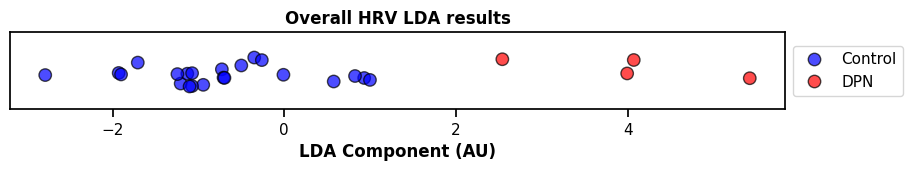

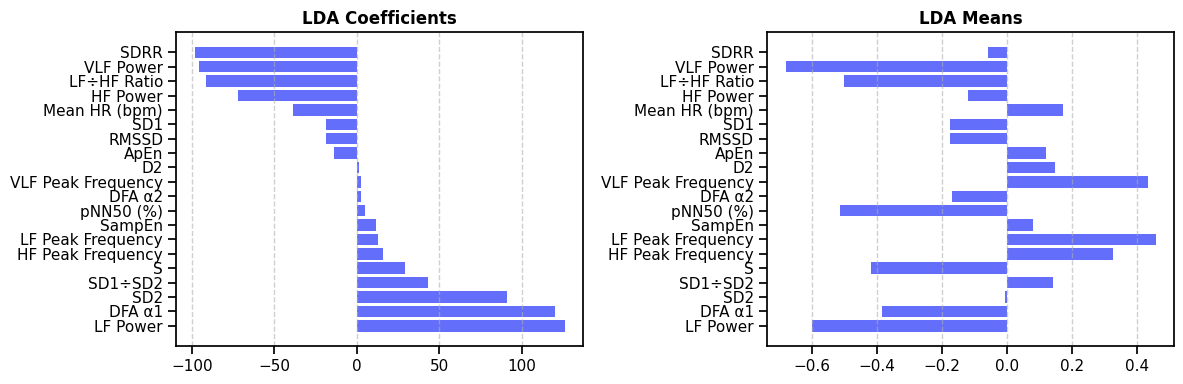

In [163]:
lda_df, lda = LV.perform_lda(median, indicator_columns)
LV.plot_linear_lda(lda_df, "Overall HRV LDA results")
df = LV.show_linear_lda_stats(lda, indicator_columns) 

In [164]:
from IPython.display import display
df_transposed = df.transpose()
df_transposed.columns = df_transposed.loc['Columns']
df_transposed = df_transposed.drop('Columns')
display(df_transposed)


Columns,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),VLF Power,VLF Peak Frequency,LF Power,LF Peak Frequency,HF Power,HF Peak Frequency,LF÷HF Ratio,S,SD1,SD2,SD1÷SD2,ApEn,SampEn,DFA α1,DFA α2,D2
LDA Coef,-98.38,-18.65,4.83,-38.49,-95.95,2.42,125.87,12.91,-72.21,15.70,-91.28,29.22,-18.65,91.03,43.02,-13.65,11.65,119.83,2.60,1.21
Means,-0.0578,-0.18,-0.52,0.17,-0.68,0.44,-0.60,0.46,-0.12,0.33,-0.50,-0.42,-0.18,-0.00539,0.14,0.12,0.0804,-0.39,-0.17,0.15


LDA allows to isolate all of the DPN patients by over-fitting.

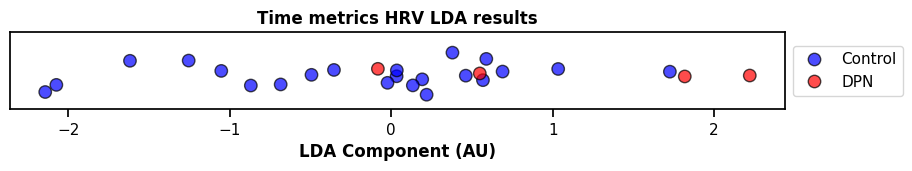

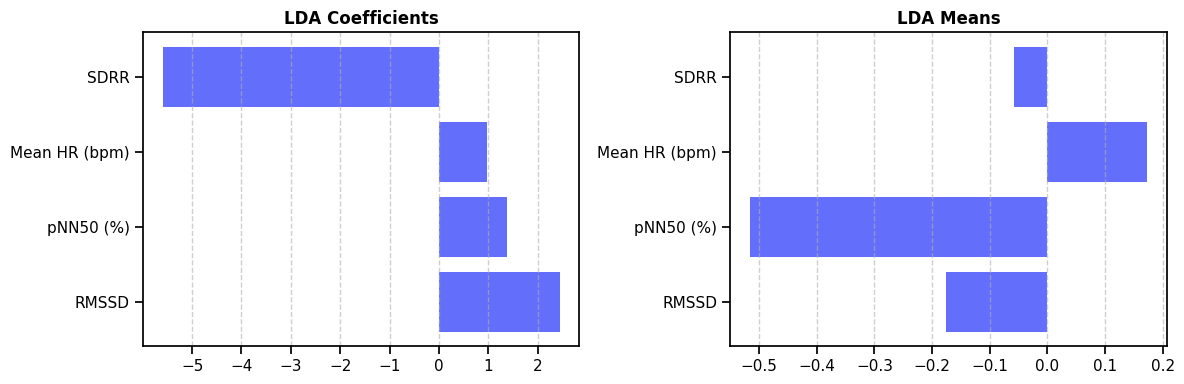

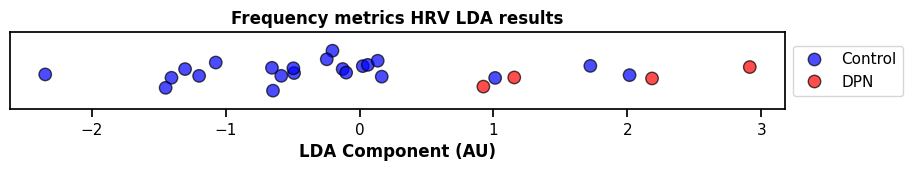

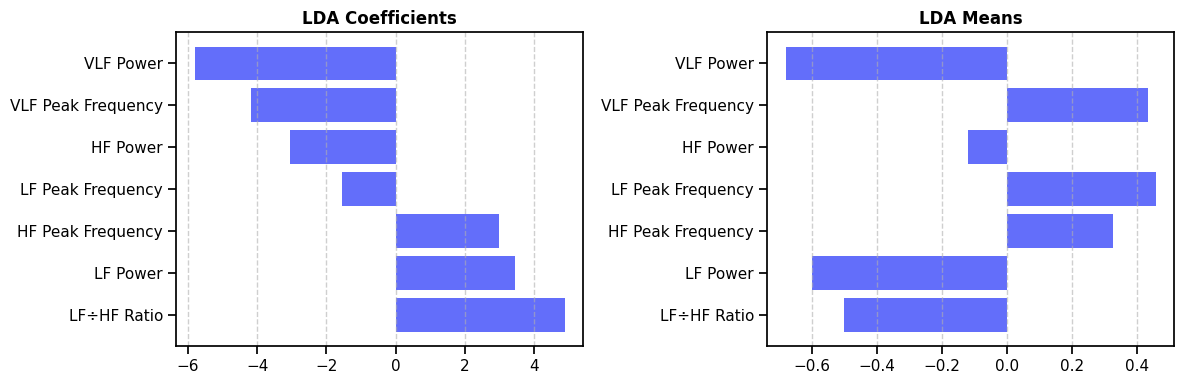

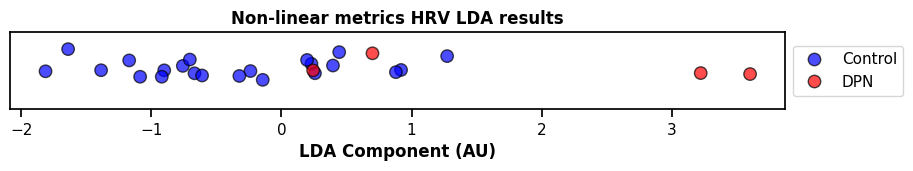

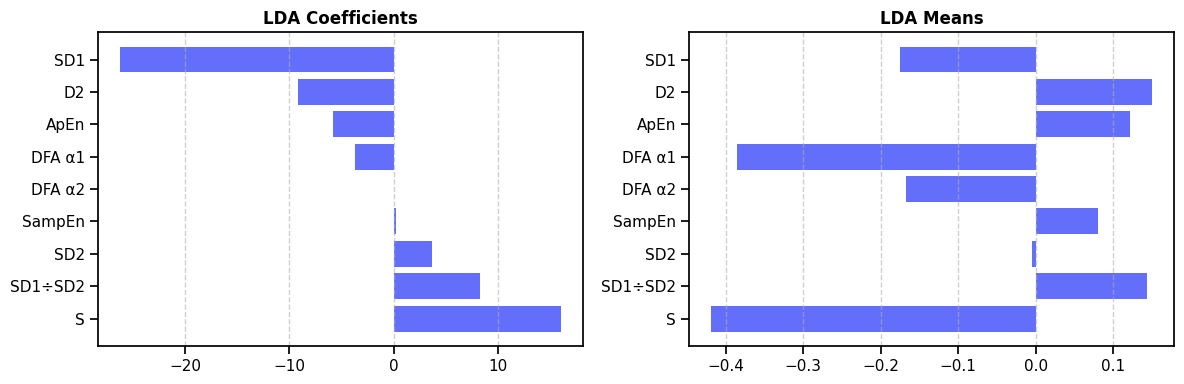

In [165]:
metric_lda = [] 
for col, name in zip([time_metrics, frequency_metrics, non_linear_metrics], ["Time", "Frequency", "Non-linear"]):
    lda_df, lda = LV.perform_lda(median_pivot, col)
    LV.plot_linear_lda(lda_df,  f"{name} metrics HRV LDA results")
    LV.show_linear_lda_stats(lda, col)
    metric_lda.append([lda, lda_df, name])


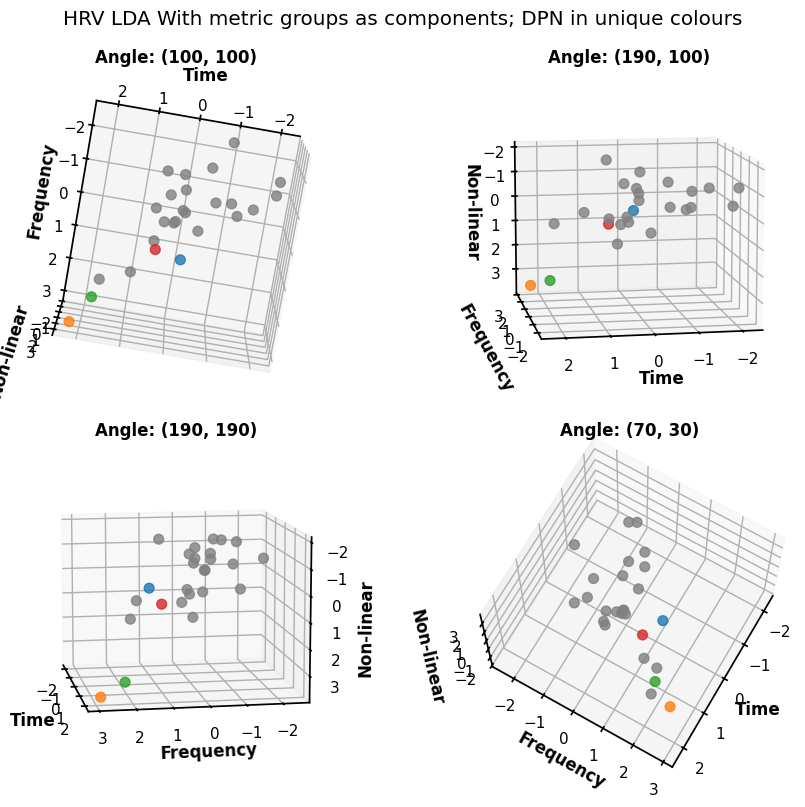

In [166]:
full_df = pd.DataFrame()
for lda, lda_df, name in metric_lda:
    full_df[name] = lda_df[0]
    
full_df["cluster"] = metric_lda[0][1]["Cluster"]


unique_dpn = full_df[full_df['cluster']].index
dpn_colors = {idx: color for idx, color in zip(unique_dpn, mcolors.TABLEAU_COLORS)}

fig = plt.figure(figsize=(10, 8))

# Define the angles for the subplots
angles = [(100, 100), (190, 100), (190, 190), (70, 30)]

fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, angle in enumerate(angles):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.scatter(full_df['Time'], full_df['Frequency'], full_df['Non-linear'], 
               c=[dpn_colors[idx] if idx in dpn_colors else 'gray' for idx in full_df.index], 
               s=50, alpha=0.8)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Non-linear')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_title(f'Angle: {angle}')

plt.suptitle('HRV LDA With metric groups as components; DPN in unique colours')
plt.tight_layout()
plt.show()

### LDA Man whitney >0.10

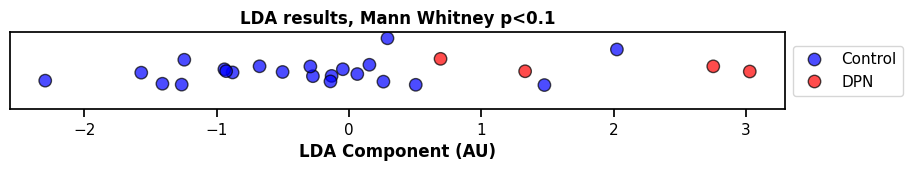

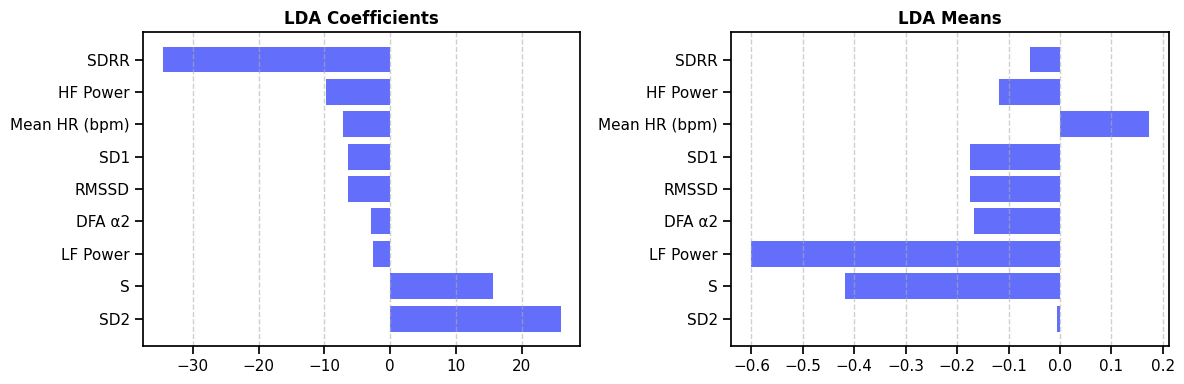

In [167]:
col = ['HF Power', 'SD2', 'SDRR', 'Mean HR (bpm)', 'LF Power', 'DFA α2', 'S',
       'RMSSD', 'SD1']

lda_df, lda = LV.perform_lda(median_pivot, col)
LV.plot_linear_lda(lda_df,  "LDA results, Mann Whitney p<0.1")
df = LV.show_linear_lda_stats(lda, col)

# LDA permutations <0.1

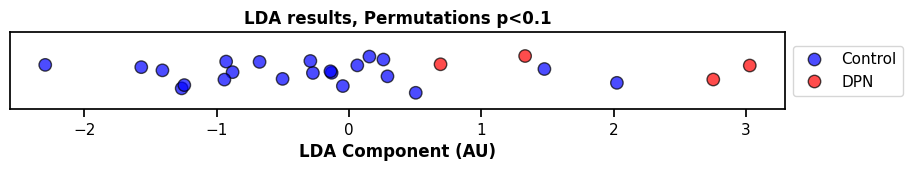

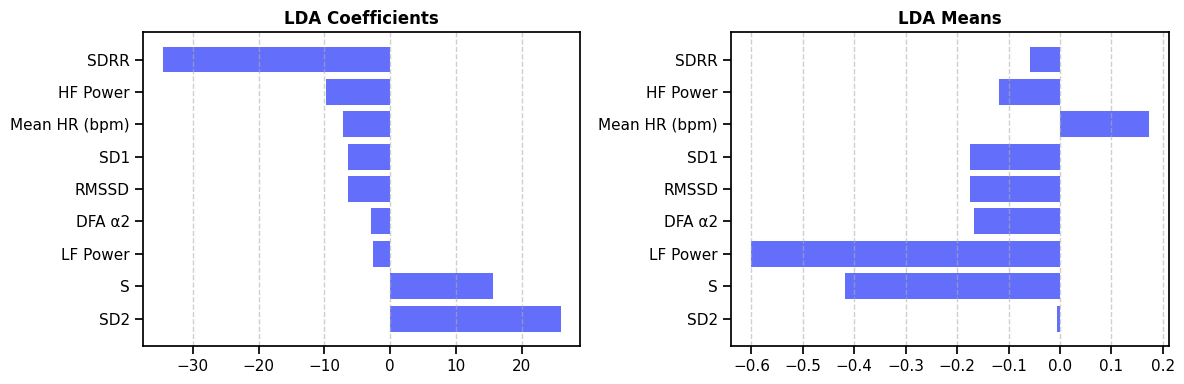

In [168]:
col = ['HF Power', 'SD2', 'SDRR', 'Mean HR (bpm)', 'LF Power', 'DFA α2', 'S',
       'RMSSD', 'SD1']

lda_df, lda = LV.perform_lda(median_pivot, col)
LV.plot_linear_lda(lda_df,  "LDA results, Permutations p<0.1")
df = LV.show_linear_lda_stats(lda, col)

In [169]:
df_transposed = df.transpose()
df_transposed.columns = df_transposed.loc['Columns']
df_transposed = df_transposed.drop('Columns')
display(df_transposed)

Columns,HF Power,SD2,SDRR,Mean HR (bpm),LF Power,DFA α2,S,RMSSD,SD1
LDA Coef,-9.77,25.86,-34.57,-7.26,-2.63,-2.93,15.54,-6.48,-6.48
Means,-0.12,-0.00539,-0.0578,0.17,-0.60,-0.17,-0.42,-0.18,-0.18


# Classifier and LDA

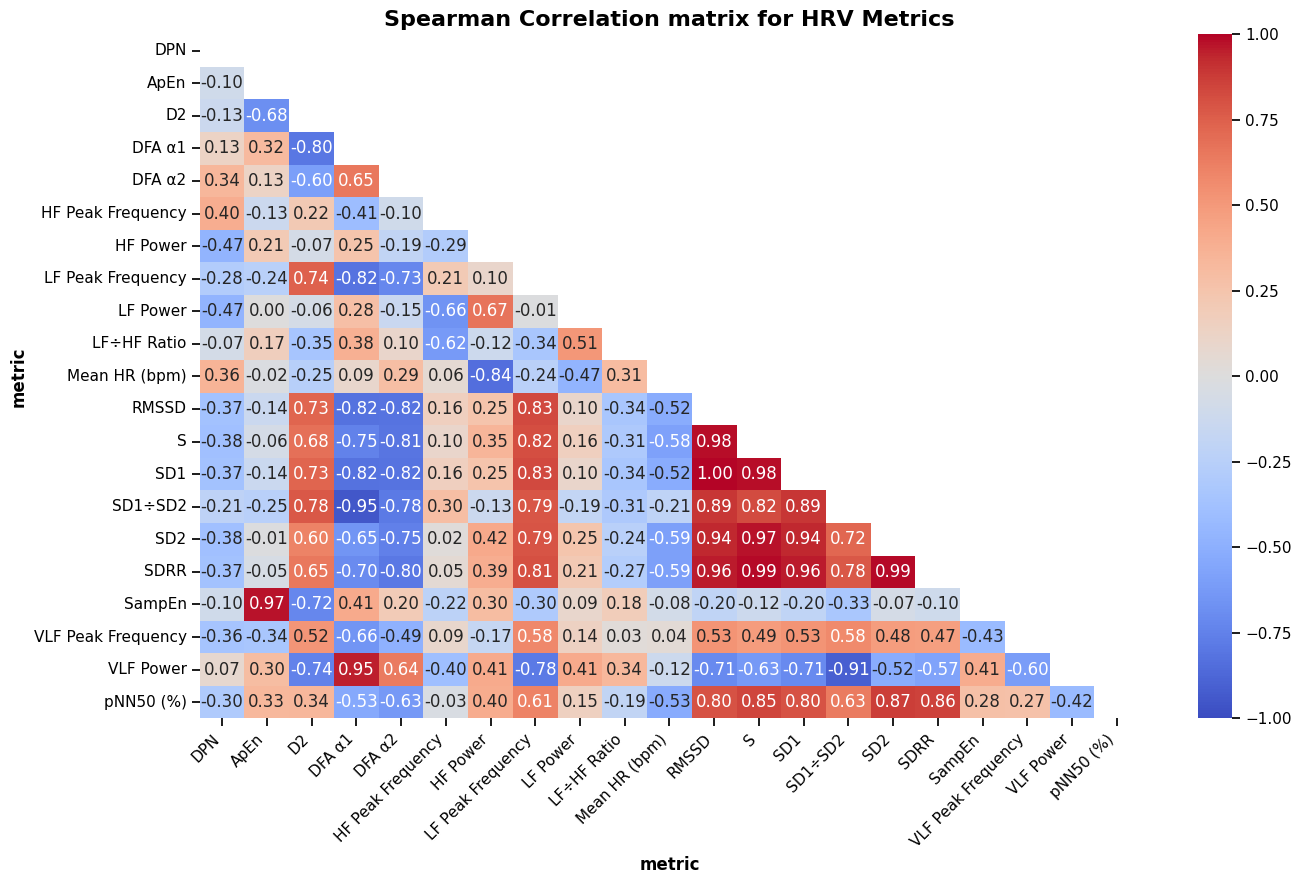

In [170]:
LV.show_correlation(median_pivot.drop(columns='id'), "Spearman Correlation matrix for HRV Metrics", (14, 9))

In [171]:
import scripts.general_utils.LDI_VIF as LV
importlib.reload(LV)

LV.get_vif(median.drop(columns =['id', 'DPN']), ['SDRR', 'VLF Power'])

,feature,Full VIF,Excluded VIF
10,RMSSD,1552697682252,1544179539644
12,SD1,1552697682252,1544179539644
0,ApEn,2604,1584
9,Mean HR (bpm),3179,1398
2,DFA α1,5522,1389
16,SampEn,1575,1127
13,SD1÷SD2,1174,1029
17,VLF Peak Frequency,816.41,805.18
8,LF÷HF Ratio,876.79,529.91
3,DFA α2,448.43,424.61


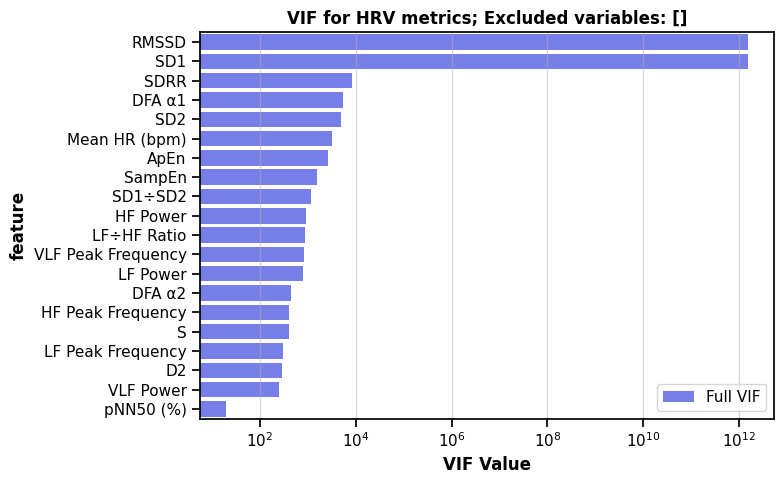

In [172]:


LV.plot_vif(LV.get_vif(median.drop(columns =['id', 'DPN'])))


Log classifier fails to converge, because a separation could not be identified.

## LDA feature isolation

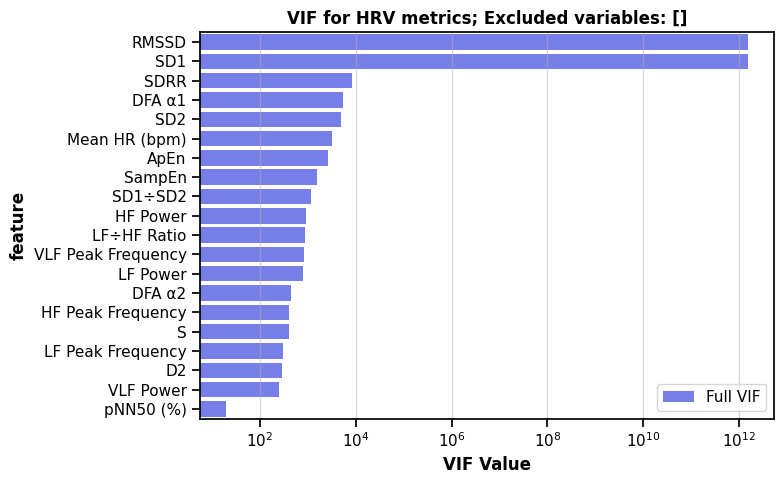

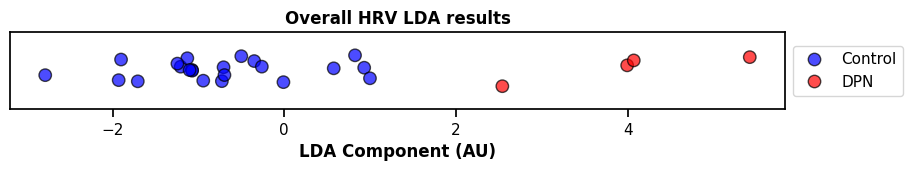

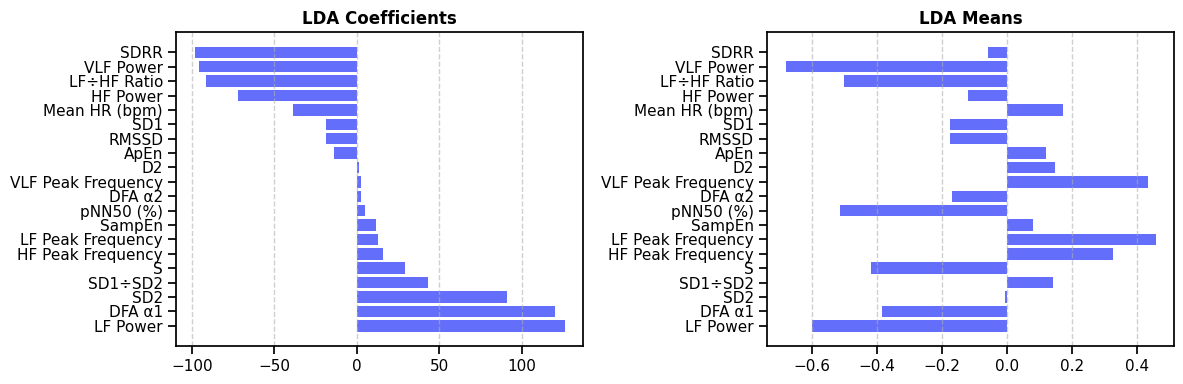

In [173]:
LV.plot_vif(LV.get_vif(median.drop(columns =['id', 'DPN'])))
lda_df, lda = LV.perform_lda(median, indicator_columns)
LV.plot_linear_lda(lda_df, "Overall HRV LDA results")
df = LV.show_linear_lda_stats(lda, indicator_columns)


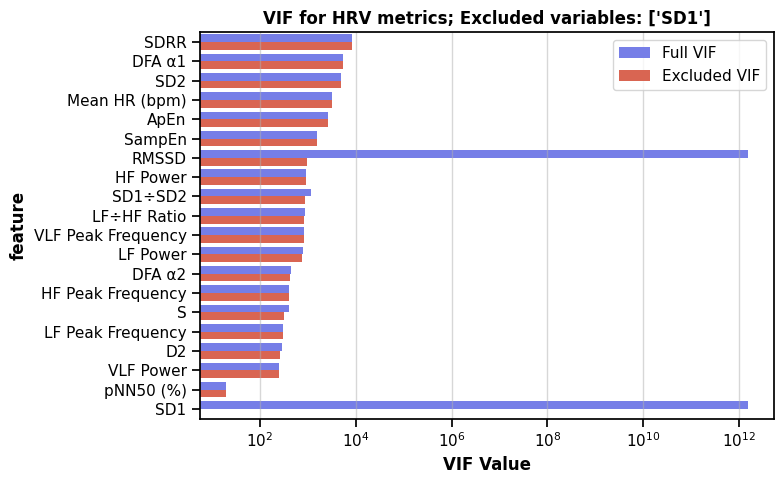

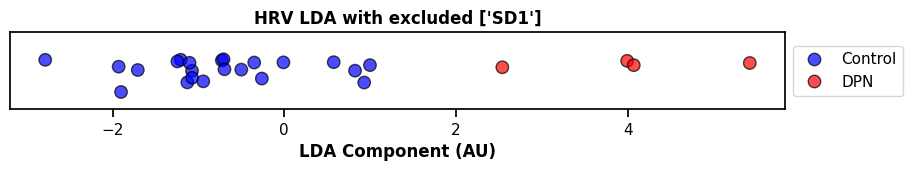

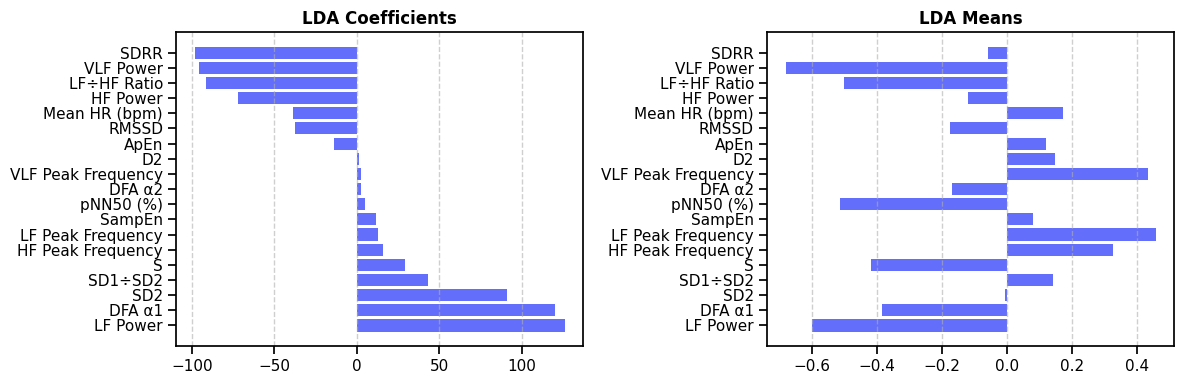

In [174]:
LV.lda_vif_exclude(median, 'SD1')
median = median.drop(columns ='SD1')

SD can be very easily excluded

In [175]:
median.columns

Index(['id', 'DPN', 'ApEn', 'D2', 'DFA α1', 'DFA α2', 'HF Peak Frequency',
       'HF Power', 'LF Peak Frequency', 'LF Power', 'LF÷HF Ratio',
       'Mean HR (bpm)', 'RMSSD', 'S', 'SD1÷SD2', 'SD2', 'SDRR', 'SampEn',
       'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')

index.columns

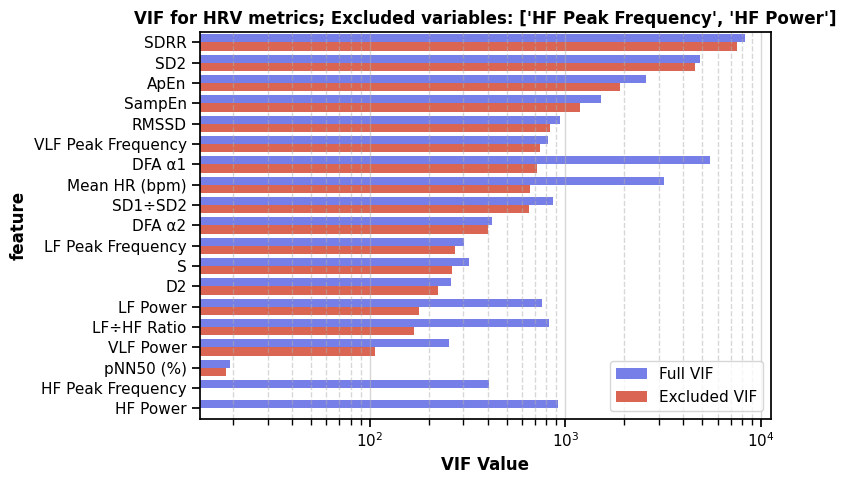

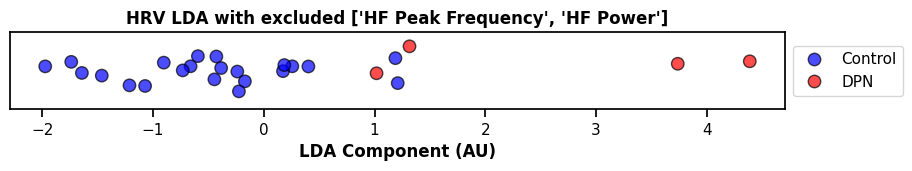

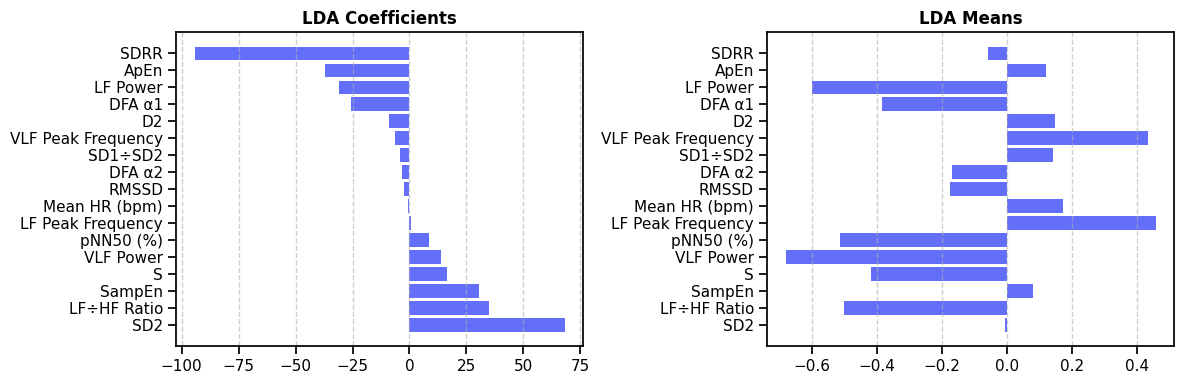

In [176]:
LV.lda_vif_exclude(median, ['HF Peak Frequency', 'HF Power'])
median = median.drop(columns =['HF Peak Frequency', 'HF Power'])


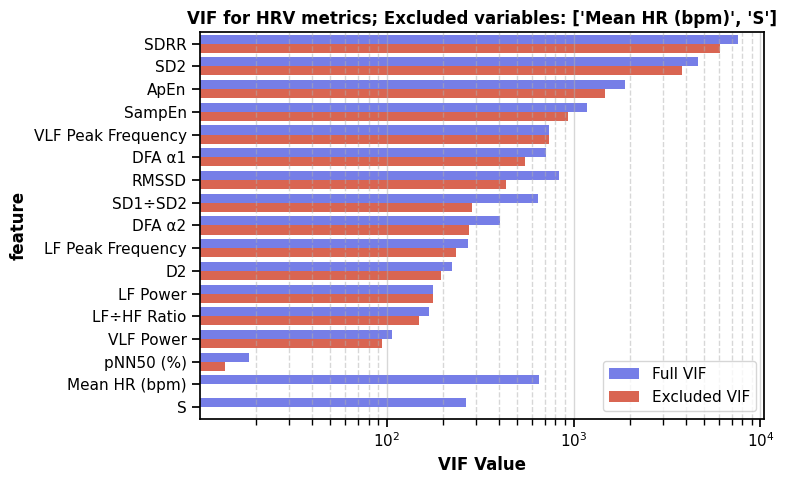

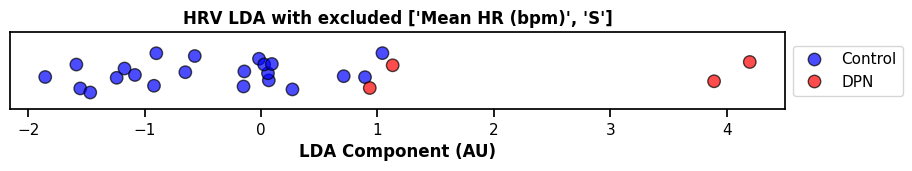

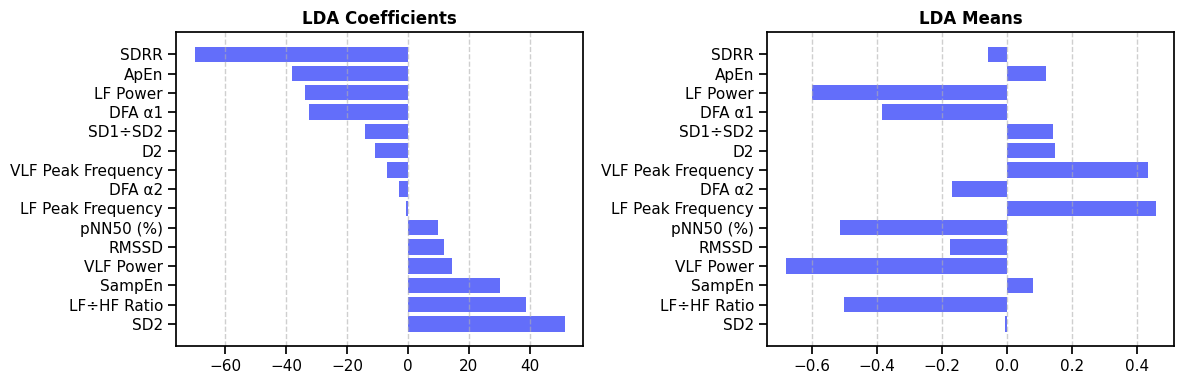

In [177]:
LV.lda_vif_exclude(median, ['Mean HR (bpm)', 'S'])
median = median.drop(columns =['Mean HR (bpm)', 'S'])

In [178]:
median.columns

Index(['id', 'DPN', 'ApEn', 'D2', 'DFA α1', 'DFA α2', 'LF Peak Frequency',
       'LF Power', 'LF÷HF Ratio', 'RMSSD', 'SD1÷SD2', 'SD2', 'SDRR', 'SampEn',
       'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')

SD2 is too important for separation to drop

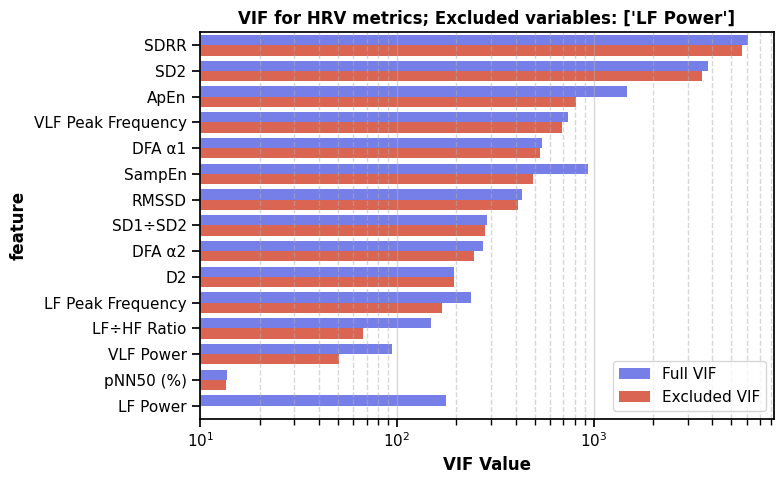

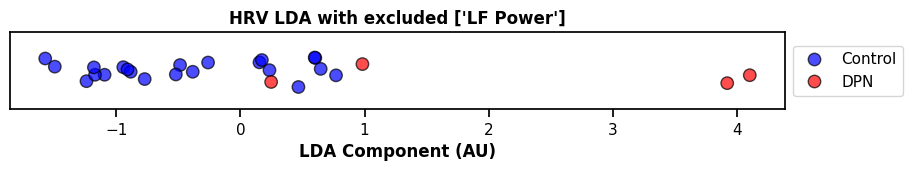

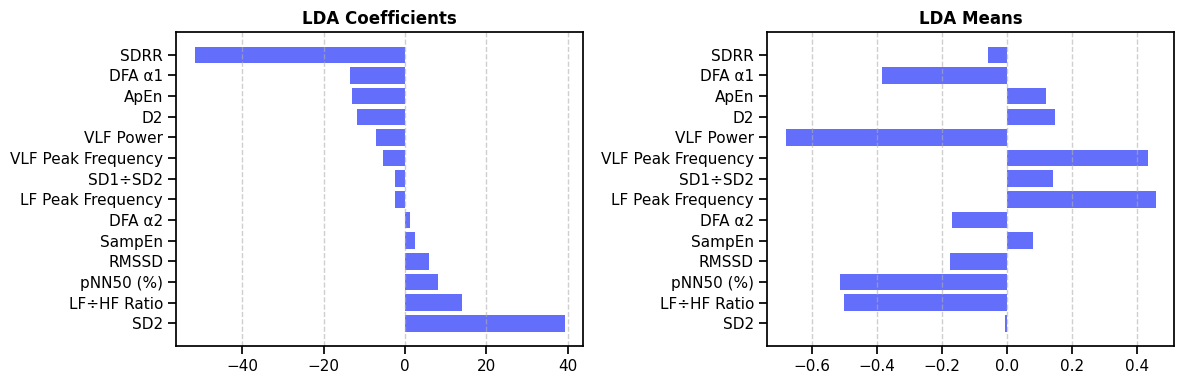

In [179]:
LV.lda_vif_exclude(median, ['LF Power', ])
median = median.drop(columns =['LF Power'])


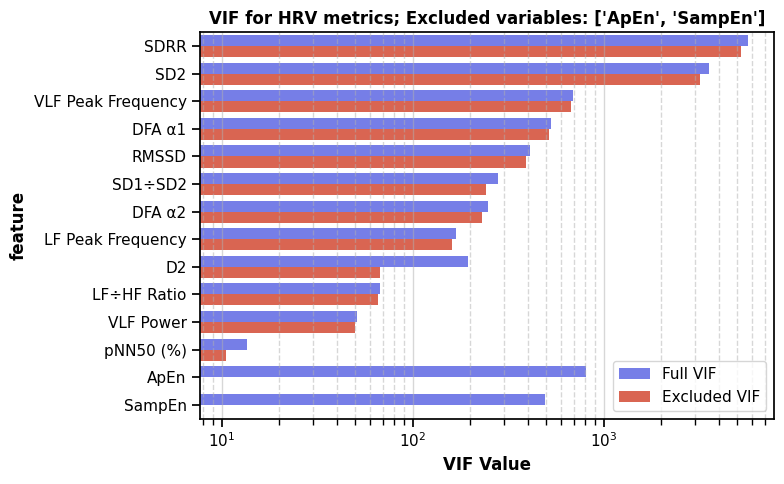

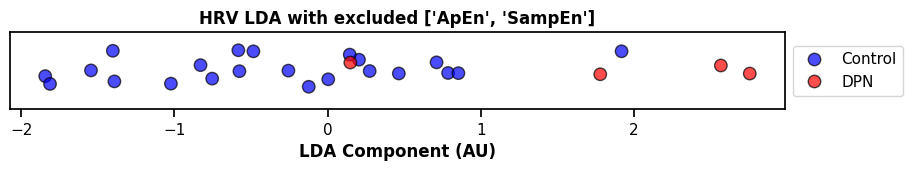

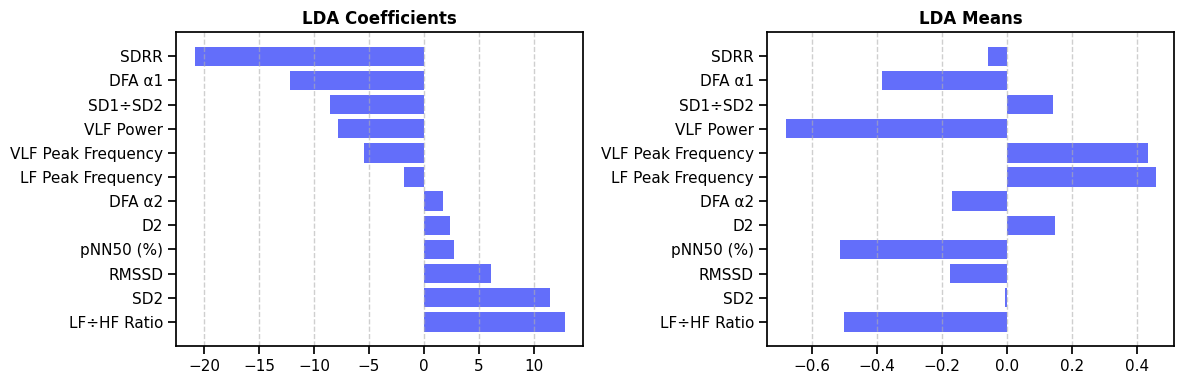

In [180]:
LV.lda_vif_exclude(median, ['ApEn', 'SampEn'])
median = median.drop(columns =['ApEn', 'SampEn'])

In [181]:
median.columns

Index(['id', 'DPN', 'D2', 'DFA α1', 'DFA α2', 'LF Peak Frequency',
       'LF÷HF Ratio', 'RMSSD', 'SD1÷SD2', 'SD2', 'SDRR', 'VLF Peak Frequency',
       'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')

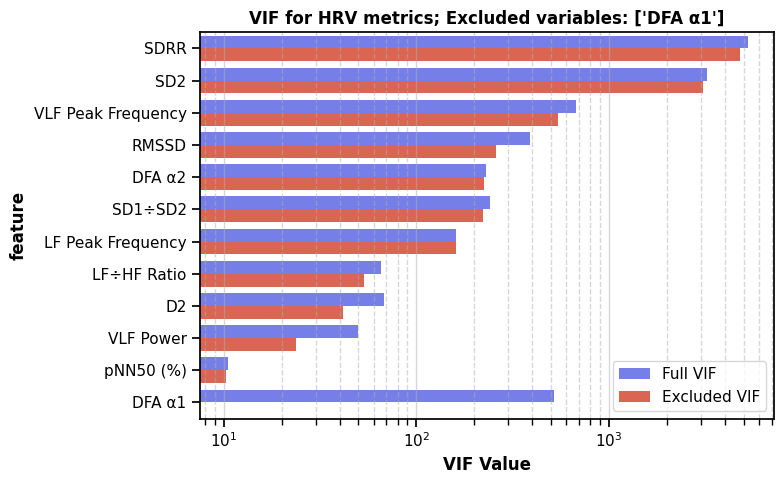

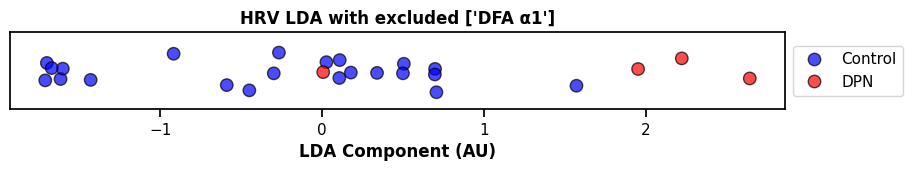

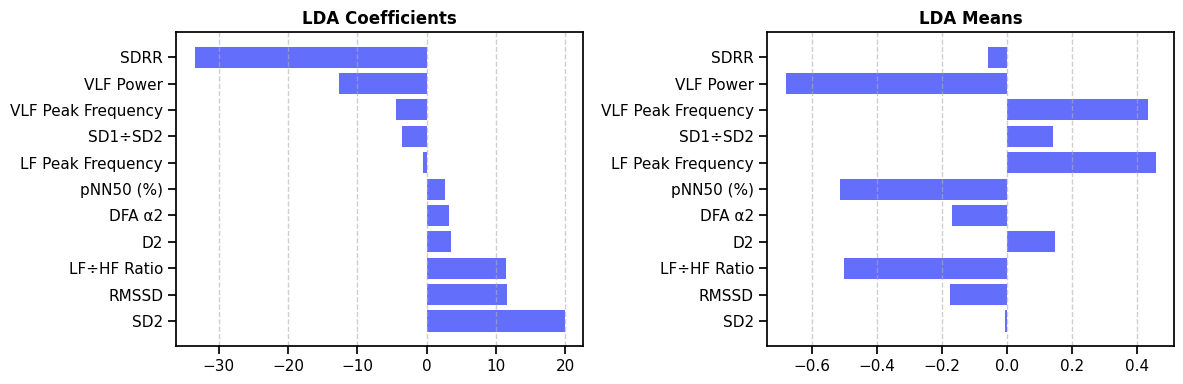

In [182]:
LV.lda_vif_exclude(median, ['DFA α1'])
data.drop(columns =['DFA α1']);


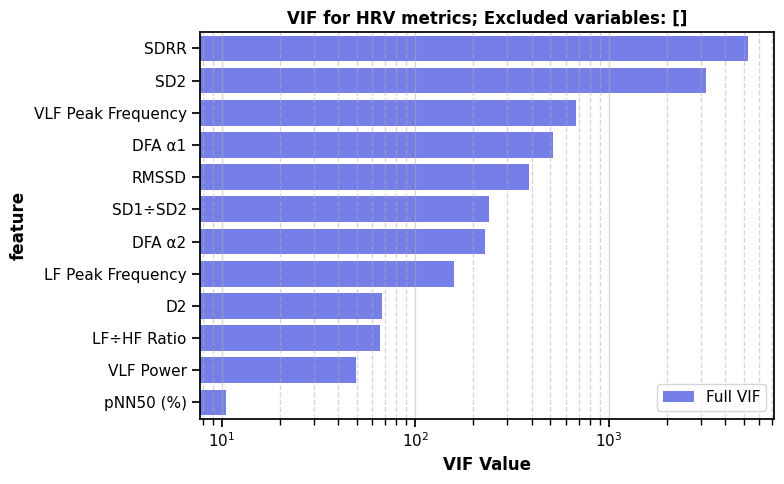

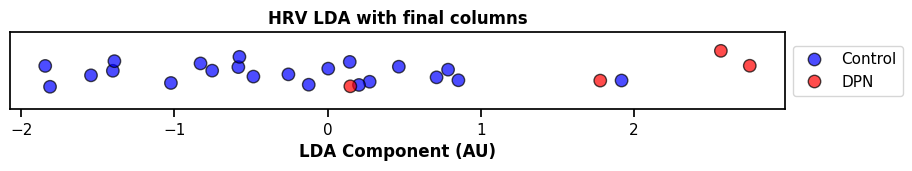

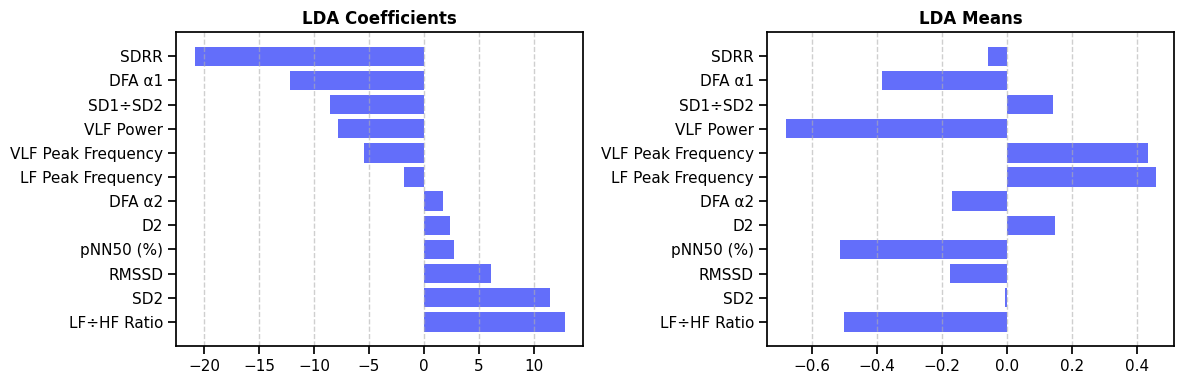

In [183]:
def show_current_lda(median, title = "HRV LDA with final columns"):
    columns = [columns for columns in median.columns if columns not in ['id', 'DPN']]

    LV.plot_vif(LV.get_vif(median.drop(columns =['id', 'DPN'])))
    lda_df, lda = LV.perform_lda(median, columns)
    LV.plot_linear_lda(lda_df, title)
    LV.show_linear_lda_stats(lda, columns)

show_current_lda(median)

### Result interpretation

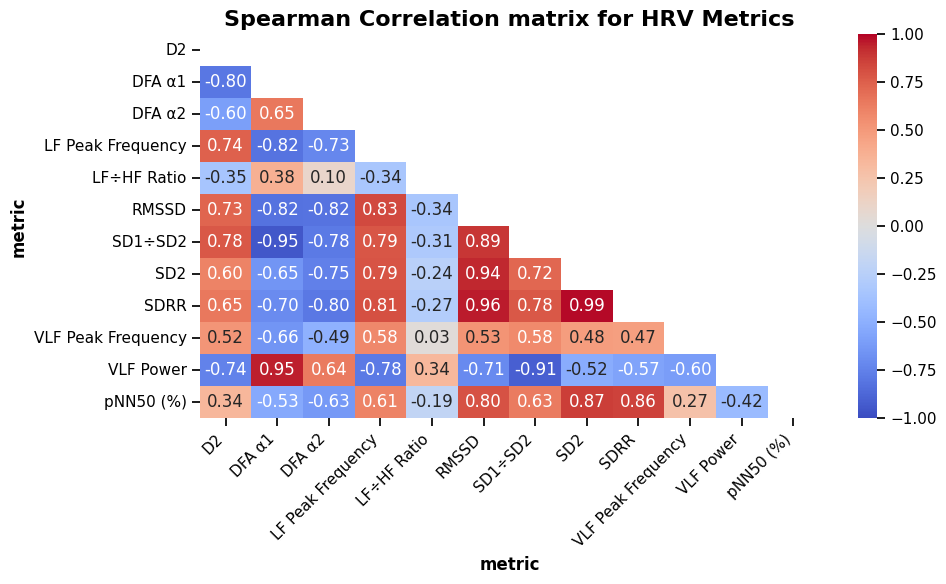

In [184]:
LV.show_correlation(median.drop(columns=['id', 'DPN']), "Spearman Correlation matrix for HRV Metrics", (10,6))

In [185]:
try:
    features = [columns for columns in median.columns if columns not in ['id', 'DPN']]
    classify_by_feat(median, features)
except:
    print("Error in classification")

['D2', 'DFA α1', 'DFA α2', 'LF Peak Frequency', 'LF÷HF Ratio', 'RMSSD', 'SD1÷SD2', 'SD2', 'SDRR', 'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)']
         Current function value: inf
         Iterations: 1000
Error in classification


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


## Sacrifice of predictive power for separation

In [186]:
median.columns

Index(['id', 'DPN', 'D2', 'DFA α1', 'DFA α2', 'LF Peak Frequency',
       'LF÷HF Ratio', 'RMSSD', 'SD1÷SD2', 'SD2', 'SDRR', 'VLF Peak Frequency',
       'VLF Power', 'pNN50 (%)'],
      dtype='object', name='metric')

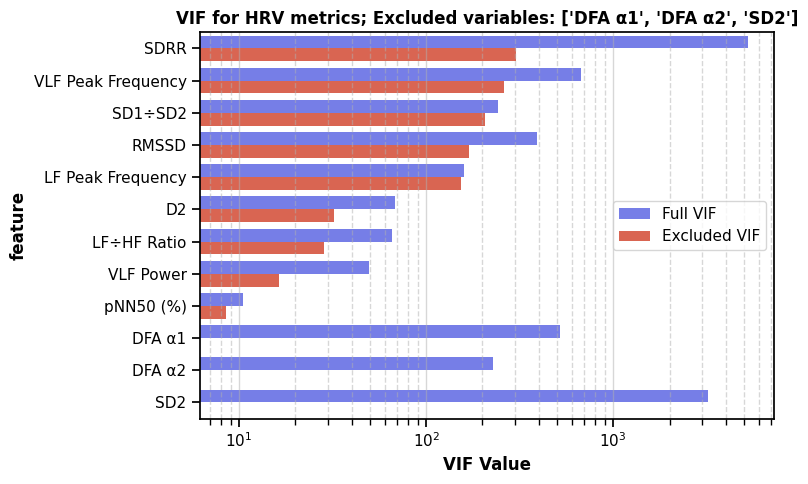

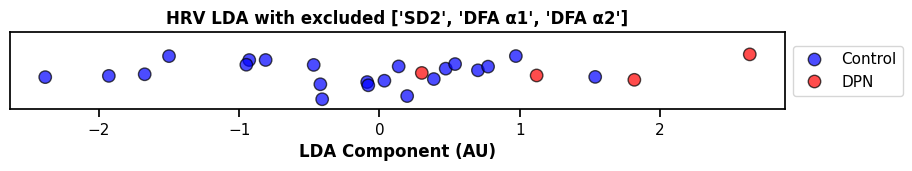

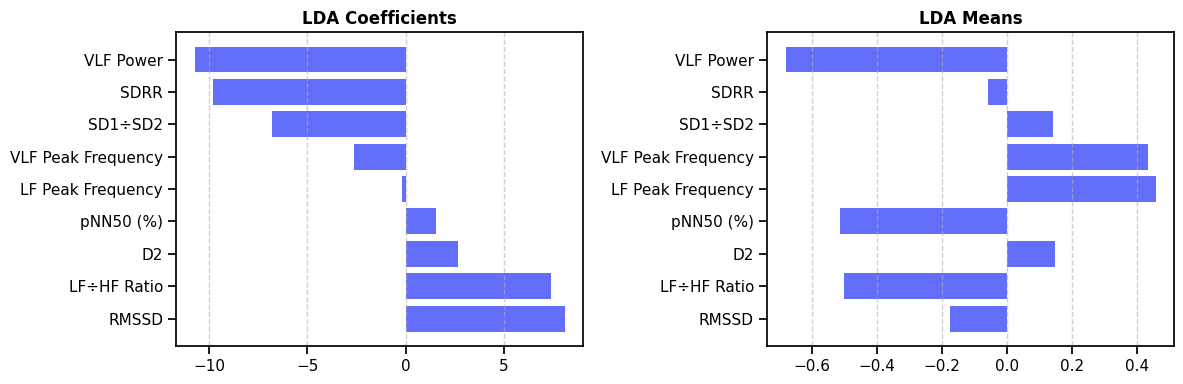

In [187]:
LV.lda_vif_exclude(median, ['SD2','DFA α1', 'DFA α2'])
less_sep = median.copy().drop(columns = ['SD2','DFA α1', 'DFA α2'])


In [188]:
try:
    features = [columns for columns in less_sep.columns if columns not in ['id', 'DPN']]
    classify_by_feat(less_sep, features)
except:
    print("Error in classification")

['D2', 'LF Peak Frequency', 'LF÷HF Ratio', 'RMSSD', 'SD1÷SD2', 'SDRR', 'VLF Peak Frequency', 'VLF Power', 'pNN50 (%)']
         Current function value: inf
         Iterations: 1000
Error in classification


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Removal of SD2 produces very tight distribution for all but one component.

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        22
        True       1.00      0.75      0.86         4

    accuracy                           0.96        26
   macro avg       0.98      0.88      0.92        26
weighted avg       0.96      0.96      0.96        26

Number of nodes in the decision tree: 9


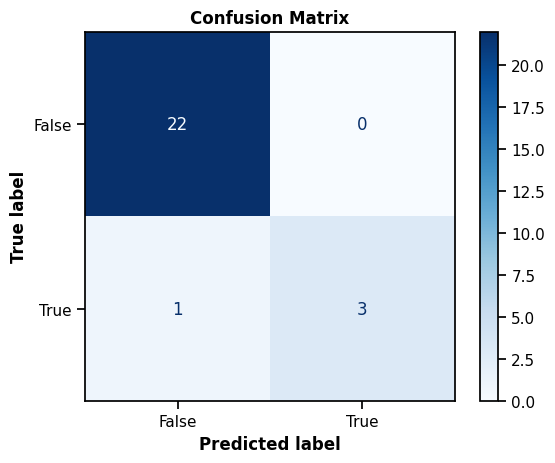

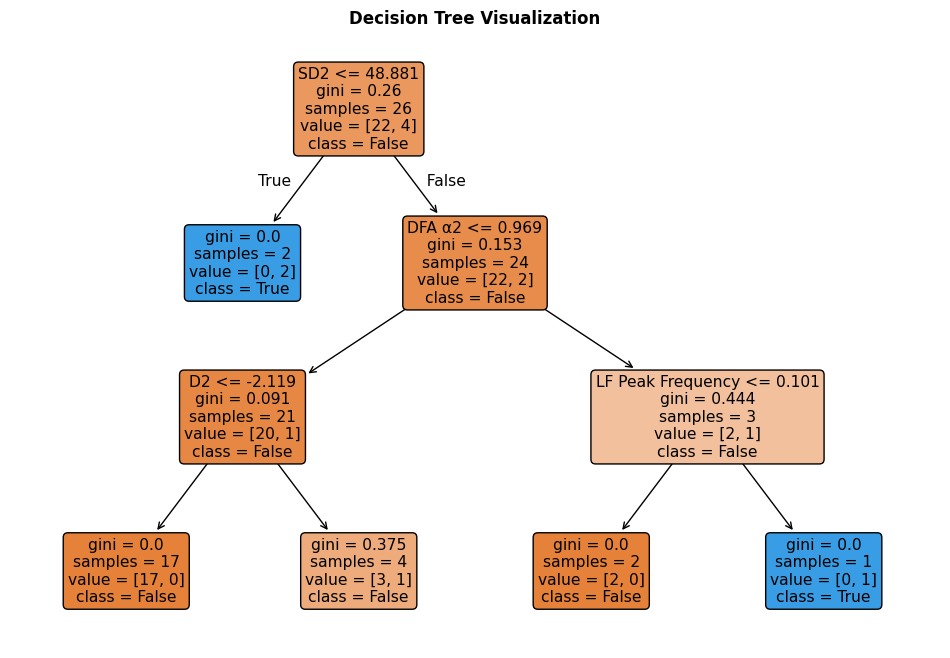

In [189]:
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Prepare the data
X = median.drop(columns=['id', 'DPN'])
y = median['DPN']

# Fit the decision tree
clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=5)
clf.fit(X, y)

# Predict and evaluate
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

print(f"Number of nodes in the decision tree: {clf.tree_.node_count}")

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=['False', 'True'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['False', 'True'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Automatic VIF LDA

Removed: RMSSD
Removed: SDRR
Removed: DFA α1
Removed: ApEn
Removed: SD1
Removed: VLF Peak Frequency
Removed: Mean HR (bpm)
Removed: HF Peak Frequency
Removed: SD2
Removed: LF÷HF Ratio
Removed: LF Peak Frequency
Removed: D2
Removed: DFA α2
Removed: SD1÷SD2
Removed: HF Power
Remaining features: ['LF Power', 'S', 'SampEn', 'VLF Power', 'pNN50 (%)']


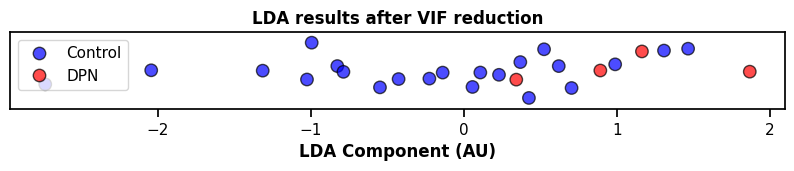

In [190]:

importlib.reload(LV)

vif_median = median_pivot.copy()
removed_features = []
n = 5

for _ in range(20-n):
    vif_data = LV.get_vif(vif_median.drop(columns=['id', 'DPN']))
    max_vif_value = vif_data["Full VIF"].max()
    if max_vif_value < 5:
        break
    max_vif_col = vif_data.loc[vif_data["Full VIF"] == max_vif_value, "feature"].iloc[0]
    vif_median = vif_median.drop(columns=[max_vif_col])
    removed_features.append(max_vif_col)
    print(f"Removed: {max_vif_col}")

remaining_features = [col for col in vif_median.columns if col not in removed_features + ['id', 'DPN']]
print(f"Remaining features: {remaining_features}")
lda_df, lda = LV.perform_lda(vif_median, remaining_features)
LV.plot_linear_lda(lda_df, "LDA results after VIF reduction")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Control', 'DPN'])
#LV.show_linear_lda_stats(lda, remaining_features)
#LV.plot_vif(LV.get_vif(vif_median.drop(columns=['id', 'DPN'])))

#print(lda_df)


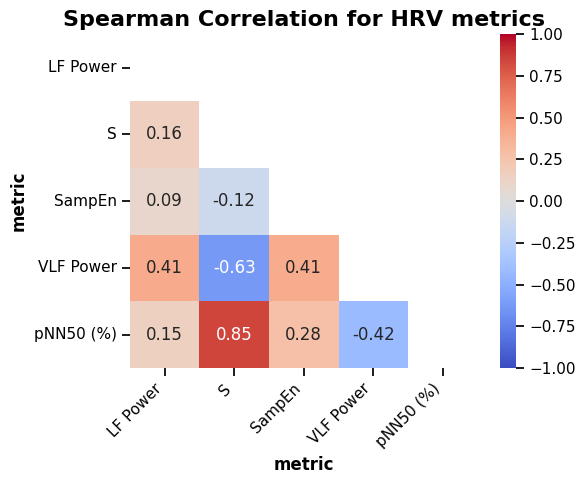

In [191]:
LV.show_correlation(vif_median.drop(columns=['id', 'DPN']), "Spearman Correlation for HRV metrics", (6,5))


# Old features

['LF Power', 'S', 'SampEn', 'VLF Power', 'pNN50 (%)']
Optimization terminated successfully.
         Current function value: 0.255241
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    DPN   No. Observations:                   26
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                  0.4055
Time:                        01:27:44   Log-Likelihood:                -6.6363
converged:                       True   LL-Null:                       -11.162
Covariance Type:            nonrobust   LLR p-value:                    0.1070
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5125      2.141     -2.107      0.035

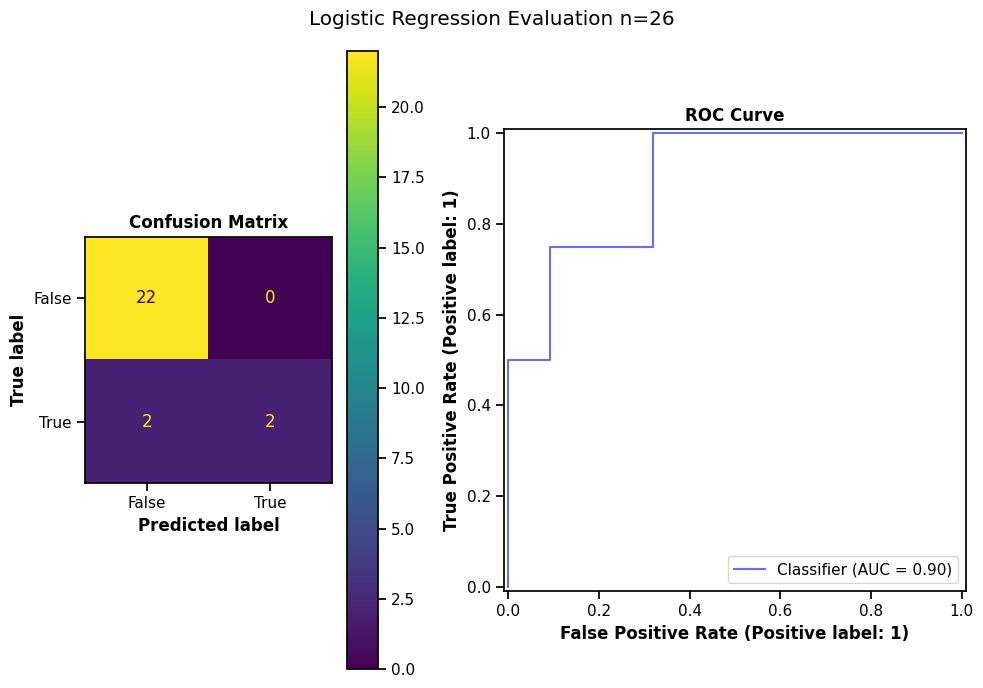

In [192]:
old_features = ['D2', 'SD1÷SD2', 'S', 'VLF Power', 'pNN50 (%)']
# Added with addition of patients data
res = classify_by_feat(median_pivot, remaining_features);

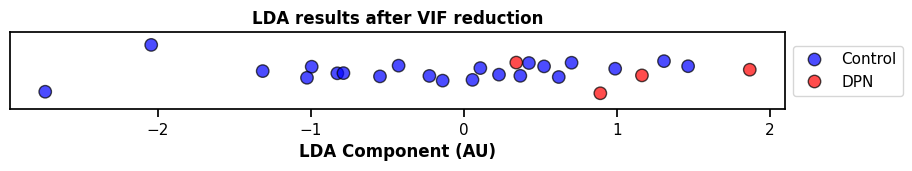

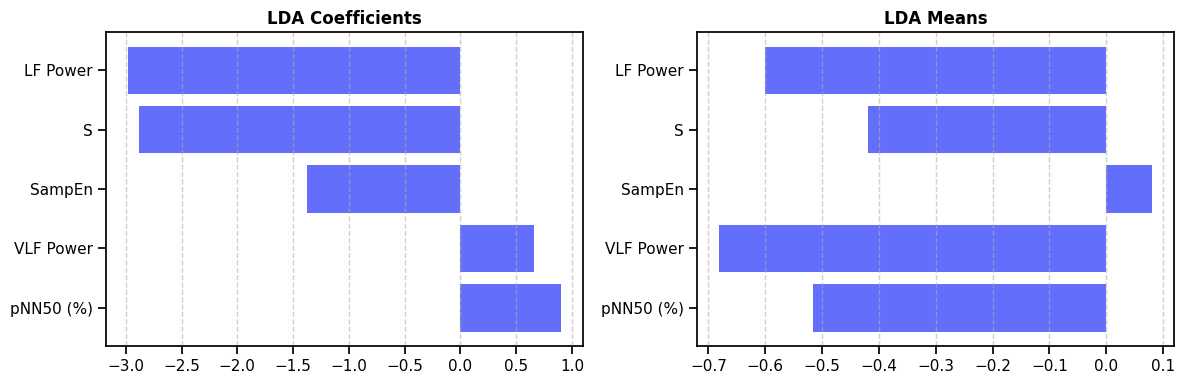

,Columns,LDA Coef,Means
0,LF Power,-2.98,-0.60
1,S,-2.88,-0.42
2,SampEn,-1.37,0.0804
3,VLF Power,0.66,-0.68
4,pNN50 (%),0.90,-0.52


In [193]:
lda_df, lda = LV.perform_lda(median_pivot, remaining_features)
LV.plot_linear_lda(lda_df, "LDA results after VIF reduction")
LV.show_linear_lda_stats(lda, remaining_features)

In [194]:
remaining_features

['LF Power', 'S', 'SampEn', 'VLF Power', 'pNN50 (%)']

In [195]:
plots = median_pivot.copy()
exclude = [feature for feature in plots if feature not in (remaining_features + ['id', 'DPN'])]
print(exclude)

['ApEn', 'D2', 'DFA α1', 'DFA α2', 'HF Peak Frequency', 'HF Power', 'LF Peak Frequency', 'LF÷HF Ratio', 'Mean HR (bpm)', 'RMSSD', 'SD1', 'SD1÷SD2', 'SD2', 'SDRR', 'VLF Peak Frequency']


['ApEn', 'D2', 'DFA α1', 'DFA α2', 'HF Peak Frequency', 'HF Power', 'LF Peak Frequency', 'LF÷HF Ratio', 'Mean HR (bpm)', 'RMSSD', 'SD1', 'SD1÷SD2', 'SD2', 'SDRR', 'VLF Peak Frequency']


C:\Users\USER\AppData\Local\Temp\ipykernel_19824\2464129880.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e10)


Text(-71.75, 0.5, 'Feature')

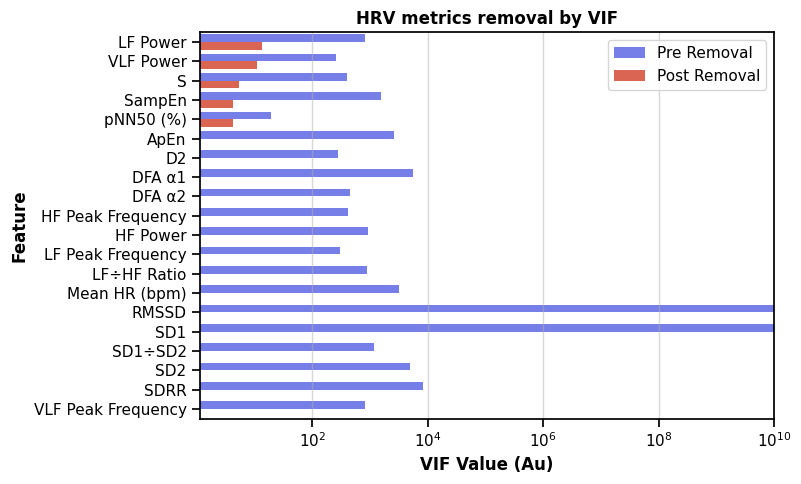

In [196]:
importlib.reload(LV)
plots = median_pivot.copy()
drop = [feature for feature in plots if feature not in (remaining_features + ['id', 'DPN'])]
print(drop)
LV.plot_vif_exclude(plots, drop)
plt.title("HRV metrics removal by VIF")
plt.xlim(0, 1e10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Pre Removal", "Post Removal"])
plt.xlabel("VIF Value (Au)")
plt.ylabel("Feature") 

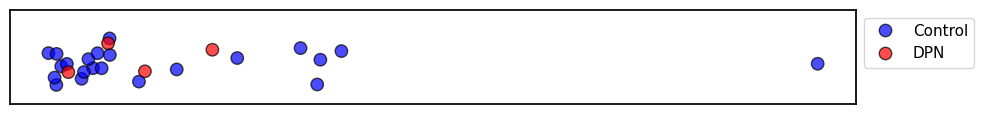

In [199]:
def vif_reduction(data, n=5):
    vif_median = data.copy()
    removed_features = []

    for _ in range(20 - n):
        vif_data = LV.get_vif(vif_median.drop(columns=['id', 'DPN']))
        max_vif_value = vif_data["Full VIF"].max()


        max_vif_col = vif_data.loc[vif_data["Full VIF"] == max_vif_value, "feature"].iloc[0]
        vif_median = vif_median.drop(columns=[max_vif_col])
        removed_features.append(max_vif_col)
        #print(f"Removed: {max_vif_col}")

    remaining_features = [col for col in vif_median.columns if col not in removed_features + ['id', 'DPN']]
    #print(f"Remaining features: {remaining_features}")



    lda_df, lda = LV.perform_lda(vif_median, remaining_features)
    LV.plot_linear_lda(lda_df, "LDA results after VIF reduction")
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Control', 'DPN'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(None)

    if len(remaining_features)<6:
        plt.xlabel(f"LDA Component from: {', '.join(remaining_features)}")
    else:
        plt.xlabel(f"LDA Component from {len(remaining_features)} metrics")

    #plt.tight_layout()
    

    plt.xlabel(None)
    plt.xticks([])
   # plt.ylabel()


    plt.gcf().set_size_inches(10, 1.3)
    plt.tight_layout()
    #plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    plt.savefig(f"resources/lda/VIF_reduction_n{n}.png", dpi=450)
    return remaining_features, lda_df, lda


# Example usage
remaining_features, lda_df, lda = vif_reduction(median_pivot.copy(), n=1)

#print(lda_df)


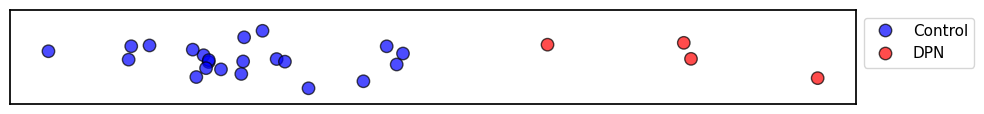

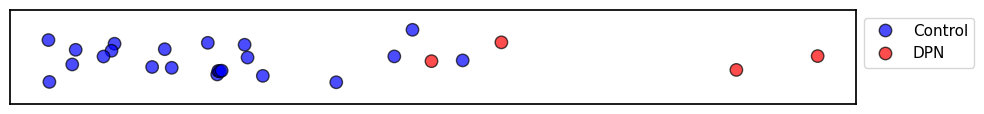

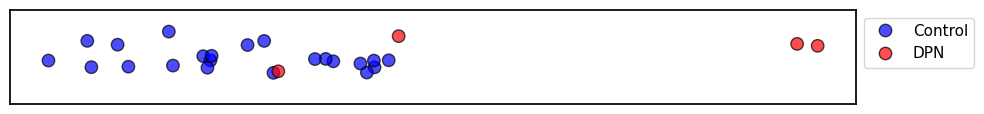

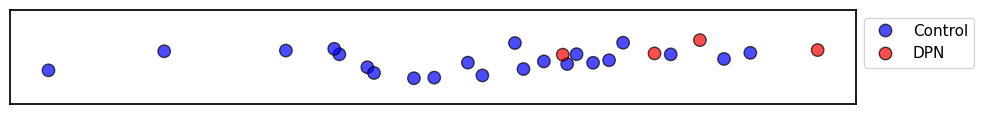

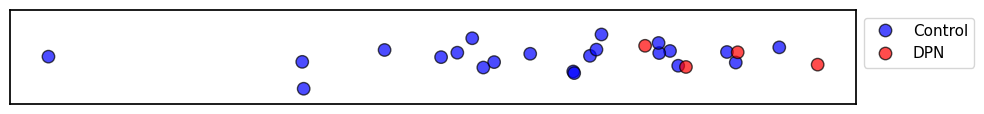

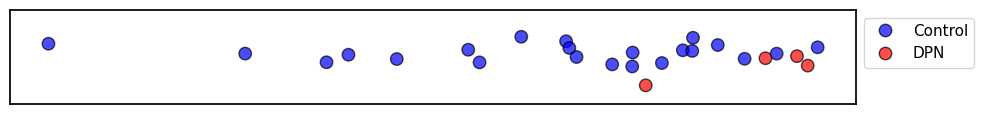

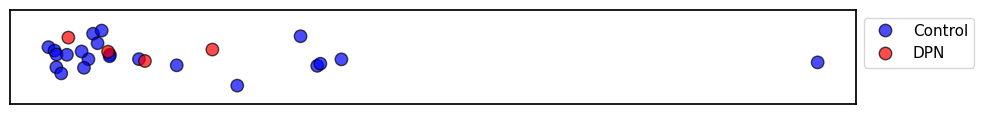

In [200]:
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=20)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=15)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=10)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=5)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=4)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=2)
remaining_features, lda_df, lda = vif_reduction(median_pivot, n=1)